#**Introduction to Data Science**

####**Project 1: Final Projects - House Price Prediction - 21KDL**

> Nhóm 16:

> Thành viên:
1.   21280115 - Trần Đức Trung (Nhóm trưởng)
2.   21280113 - Lê Quang Trung
3.   21280035 - Nguyễn Phúc Gia Nghi
4.   21280012 - Nguyễn Đông Hải














Objective:
In this final project, students will demonstrate their end-to-end skills in data scraping, data preprocessing, feature engineering, modeling, and evaluation. The task involves predicting house prices using machine learning models. The following requirements outline the project details.


# Part 1: Data Colection

##1. Import packages

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import urllib.request
import re
import os

##2. Web Scraping & Regular Expressions



###   Lấy dữ liệu HTML và trích xuất thành văn bản. Sau đó sử dụng 'lxml' để phân tích cú pháp HTML.







In [ ]:
html_text = requests.get('https://batdongsan.vn/ban-nha/').text
soup = BeautifulSoup(html_text, "lxml")

In [ ]:
pages_url=[]





*   Hàm lấy dữ liệu HTML và trích xuất thành văn bản, sau đó sử dụng 'lxml' để phân tích cú pháp HTML thông qua địa chỉ của một trang web bất kỳ được truyền vào.





In [ ]:
def get_dom(url):
    with urllib.request.urlopen(url) as response:
        html = response.read()
        html = html.decode('utf-8')
    response.close()
    soup = BeautifulSoup(html, 'lxml')
    return soup

### Tìm số trang của trang web bán nhà và lấy đường dẫn của mỗi trang.




*   Số trang của trang web bán nhà hiện có.



In [ ]:
number = soup.find('ul', class_ = 'uk-pagination')
page_number = int(number.find_all('a')[-1]['data-ci-pagination-page'])
page_number

499



*   Lấy đường dẫn của mỗi trang



In [ ]:
for i in range(1, page_number + 1): # link của n trang
  page_url = "https://batdongsan.vn/ban-nha/p" + str(i)
  pages_url.append(page_url)

### Các hàm  truy xuất thông tin của mỗi căn nhà.


##  Sử dụng các phương thức như .find(), .find_all() để lấy nội dung chính từ các thẻ của HTML





*   Hàm truy xuất ID của một căn nhà.



In [ ]:
def get_ID(dom):
    try:
        temp = dom.find('div', class_='project-global-object-block-003 information-custom')
        id_element = temp.find('strong', string = 'Mã tin:')
        id = id_element.next_sibling.strip().split(' ')[0]
    except Exception as e:
        id = "ID is not available"
    return id



*   Hàm truy xuất giá bán của một căn nhà.



In [ ]:
def get_Price(dom):
    try:
        temp = dom.find('div', class_='project-global-object-block-003 information-custom')
        price = temp.find('strong', class_ = "price").text.strip()
    except Exception as e:
        price = "Price is not available"
    return price



*   Hàm truy xuất địa chỉ của một căn nhà.



In [ ]:
def get_Location(dom):
    try:
        temp = dom.find('ul', class_ = "uk-breadcrumb")
        temp1 = temp.find_all('li')
        result = temp1[3].text + ', ' + temp1[2].text
    except Exception as e:
        result = "Location is not available"
    return result



*   Hàm truy xuất diện tích của một căn nhà.



In [ ]:
def get_Area(dom):
    try:
        temp = dom.find('div', class_='project-global-object-block-003 information-custom')
        area_element = temp.find('strong', string = 'Diện tích:')
        area = area_element.next_sibling.strip().split(' ')[0]
    except Exception as e:
        area = "Area is not available"
    return area



*   Hàm truy xuất số phòng WC của một căn nhà.



In [ ]:
def get_Bathroom(dom):
    try:
        temp = dom.find('div', class_='project-global-object-block-003 information-custom')
        bathroom_element = temp.find('strong', string = 'Phòng WC:')
        bathroom = bathroom_element.next_sibling.strip().split(' ')[0]
    except Exception as e:
        bathroom = "Bathroom is not available"
    return bathroom



*   Hàm truy xuất số phòng ngủ của một căn nhà.



In [ ]:
def get_Bedroom(dom):
    try:
        temp = dom.find('div', class_='project-global-object-block-003 information-custom')
        bedroom_element = temp.find('strong', string = 'Phòng ngủ:')
        bedroom = bedroom_element.next_sibling.strip().split(' ')[0]
    except Exception as e:
        bedroom = "Bedroom is not available"
    return bedroom



*   Hàm truy xuất nội dung mô tả.



In [ ]:
def get_Content(dom):
    try:
        a = dom.find('div', class_='project-global-object-block-003 information-custom')
        content1 = a.span.text
        temp = dom.find('div',class_ = 'project-global-object-block-003 block-custom').find('div', class_ ='content')
        content2 = temp.text.replace('\n','').replace('\r','').replace('+','').strip()
        content = content1 + ' ' + content2

    except Exception as e:
        content = "NULL"
    return content



*   Hàm truy xuất hình ảnh của mỗi căn nhà



In [ ]:
def get_Picture(dom,ID):
    try:
      wrapper = dom.find("div",class_='uk-slider uk-grid uk-grid-small uk-grid-width-1-3 uk-grid-width-medium-1-4')
      images = wrapper.find_all("div",class_='image cover')
      if not os.path.exists('./download/'):
        os.makedirs('./download/')
      for image in images:
        imgData = image.find('img')['src']
        if("data:image" not in imgData):
          if(imgData):
            downloadPath = './download/'
            filename = imgData.split('/')[-1]
            response = requests.get(imgData)

            file = open(downloadPath + ID + "-" + filename, "wb")
            file.write(response.content)
            file.close()
    except Exception as e:
      print("An exception occurred:", e)



###   Sử dụng RegEx để tìm kiếm và xử lý các mẫu văn bản.
*   Có 5 thông tin về một căn nhà mà ta cần trích xuất thông qua nội dung mô tả.

  1.   Kiểm tra nhà có nằm trong hẻm hay không.
  2.   Diện tích.
  3.   Số tầng.
  4.   Số phòng ngủ.
  5.   Số phòng WC.












In [ ]:
def regex_content(content):
    mat_tien = 0
    so_tang = 'NULL'
    so_pn = 'NULL'
    so_wc = 'NULL'
    dien_tich = "Area is not available"

    if content != 'NULL':
        a = re.search(r"mặt tiền|mặt phố|mặt đường",content,re.IGNORECASE)
        if a:
            mat_tien = 1

        tang=re.findall(r"tầng \d{1,2}|\d{1,2} tầng",content,re.IGNORECASE)
        tret_lau=re.findall(r"\d{1,2} lầu|\d{1,2} lửng",content,re.IGNORECASE)
        b1=re.findall("\d+"," ".join(tang))
        b2=re.findall("\d+"," ".join(tret_lau))
        if len(b1)!=0:
            b1=list(map(int,b1))
            so_tang = max(b1)
        elif len(b2)!=0:
            b2=list(map(int,b2))
            so_tang = max(b2)+1  #lầu thì luôn có trệt => +1

        c = re.findall(r"(\d+)\s*(?=phòng ngủ|pn|ngủ)",content,re.IGNORECASE)
        if len(c)!=0:
            c=list(map(int,c))
            so_pn = max(c)

        d = re.findall(r"(\d+)\s*(?=phòng vệ sinh|wc|nhà vệ sinh|nvs|pvs|vệ sinh|vs)",content,re.IGNORECASE)
        if len(d)!=0:
            d=list(map(int,d))
            so_wc = max(d)

        e = re.search(r"\d{1,3}\s*(?=m2|m²)|\d{1,3}\s*x\s*\d{1,3}",content,re.IGNORECASE)
        if e:
            dien_tich=1
            for i in list(map(int,re.findall(r"\d+",e.group()))):
                dien_tich*=i

    return  mat_tien, so_tang, so_pn, so_wc, dien_tich


###Crawl data và xuất các thông tin tìm được sang file csv.

In [ ]:
data_csv = []
for link_page in pages_url:
  soup_temp = get_dom(link_page)  # get_dom page trang
  urls = soup_temp.find('div', class_ = 'uk-grid uk-grid-small uk-grid-width-1-1')
  actual_link = urls.find_all('div', class_ = 'name')

  for data in actual_link:
    data_url = data.a['href']
    link_dom = get_dom(data_url)
    ID = get_ID(link_dom)
    if ID != 'ID is not available':
        get_Picture(link_dom,ID)
    content = get_Content(link_dom)
    price = get_Price(link_dom)
    area = get_Area(link_dom)
    location = get_Location(link_dom)
    bedroom = get_Bedroom(link_dom)
    bathroom = get_Bathroom(link_dom)
    mat_tien, so_tang, so_pn, so_wc, dien_tich = regex_content(content)
    if bedroom == 'Bedroom is not available' :
        bedroom = so_pn
    if bathroom == 'Bathroom is not available' :
        bathroom = so_wc
    if area == 'Area is not available' :
        area = dien_tich

    data_csv.append([ID, location, area, bedroom, bathroom, mat_tien, so_tang, price])

df = pd.DataFrame(data_csv, columns=['ID', 'Location', 'Area', 'Bedroom', 'Bathroom','Frontage', 'Floors', 'Price'])
df.to_csv('data_merge.csv')


# Part 2: Data Preprocessing and Feature Engineering:

In [ ]:
import pandas as pd
import numpy as np
from fancyimpute import IterativeImputer

## 1. Lấy dữ liệu từ data gốc đã crawl được, và xóa đi cột index thừa

In [ ]:
data_final = pd.read_csv("data_merge.csv")
del data_final['Unnamed: 0']
data_final

,ID,Location,Area,Bedroom,Bathroom,Frontage,Floors,Price
0,268184,"Quận 12, TP Hồ Chí Minh",130,7.0,6.0,0,3.0,9.2 tỷ
1,267895,"Quận 6, TP Hồ Chí Minh",189,NaN,NaN,1,NaN,24 tỷ
2,268639,"Gò Vấp, TP Hồ Chí Minh",52,4.0,5.0,0,6.0,9.8 tỷ
3,268638,"Gò Vấp, TP Hồ Chí Minh",105,5.0,2.0,1,4.0,8 tỷ
4,268637,"Sơn Trà, Đà Nẵng",115,3.0,2.0,1,2.0,6.2 tỷ
...,...,...,...,...,...,...,...,...
9671,250238,"Hoàng Mai, Hà Nội",54,5.0,3.0,0,4.0,4.95 tỷ
9672,250237,"Đống Đa, Hà Nội",50,4.0,NaN,0,5.0,7.5 tỷ
9673,250235,"Thủ Đức, TP Hồ Chí Minh",100,NaN,NaN,0,NaN,6 tỷ
9674,249841,"Quận 12, TP Hồ Chí Minh",52,3.0,2.0,0,2.0,3.48 tỷ


## 2. Xử lý những observation mà ở đó có area hay location không tồn tại

- Thay những khu vực có Area không tồn tại (Area is not available) bằng NaN

In [ ]:
data_final.loc[data_final['Area'] == 'Area is not available', 'Area'] = np.nan
data_final['Area'] = pd.to_numeric(data_final['Area'], errors='coerce')

- Bỏ luôn những observation không có location

In [ ]:
data_final = data_final.drop(data_final[data_final['Location'] == 'Location is not available'].index)
data_final = data_final.reset_index(drop=True)

## 3. EDA (Exploring data analysist)

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9671 entries, 0 to 9670
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        9671 non-null   object 
 1   Location  9671 non-null   object 
 2   Area      9529 non-null   float64
 3   Bedroom   7686 non-null   float64
 4   Bathroom  6490 non-null   float64
 5   Frontage  9671 non-null   int64  
 6   Floors    7654 non-null   float64
 7   Price     9671 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 604.6+ KB


In [ ]:
data_final.describe()

,Area,Bedroom,Bathroom,Frontage,Floors
count,9529.000000,7686.000000,6490.000000,9671.000000,7654.000000
mean,105.634157,3.677596,3.523421,0.397063,3.975568
std,1512.161797,3.556498,3.856034,0.489315,3.107054
min,2.000000,1.000000,1.000000,0.000000,1.000000
25%,43.000000,2.000000,2.000000,0.000000,2.000000
50%,60.000000,3.000000,3.000000,0.000000,4.000000
75%,85.000000,4.000000,4.000000,1.000000,5.000000
max,105119.000000,111.000000,111.000000,1.000000,93.000000


- Kiểm tra số giá trị thiếu

In [ ]:
print(data_final.isnull().sum())

ID             0
Location       0
Area         142
Bedroom     1985
Bathroom    3181
Frontage       0
Floors      2017
Price          0
dtype: int64


## 4. Preprocessing

    4.1 Chuyển đổi cột Frontage thành category, do đây là cột phân loại nhà mặt đường hay không

In [ ]:
data_final["Frontage"]=data_final["Frontage"].astype("category")

    4.2 Thực hiện one-hot encoding chuyển cột "Location"

- Đếm số nhà bán của một khu vực.

In [ ]:
location_stats = data_final.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
print(location_stats.to_string())

Location
Gò Vấp, TP Hồ Chí Minh               803
Bình Thạnh, TP Hồ Chí Minh           655
Tân Bình, TP Hồ Chí Minh             615
Bình Tân, TP Hồ Chí Minh             560
Thủ Đức, TP Hồ Chí Minh              432
Tân Phú, TP Hồ Chí Minh              382
Quận 7, TP Hồ Chí Minh               324
Biên Hòa, Đồng Nai                   303
Hoàng Mai, Hà Nội                    301
Đống Đa, Hà Nội                      299
Phú Nhuận, TP Hồ Chí Minh            299
Thanh Xuân, Hà Nội                   284
Hà Đông, Hà Nội                      268
Cầu Giấy, Hà Nội                     262
Hai Bà Trưng, Hà Nội                 230
Quận 9, TP Hồ Chí Minh               228
Quận 10, TP Hồ Chí Minh              227
Long Biên, Hà Nội                    202
Quận 12, TP Hồ Chí Minh              194
Quận 8, TP Hồ Chí Minh               185
Tây Hồ, Hà Nội                       160
Huế, Thừa Thiên Huế                  159
Hải Châu, Đà Nẵng                    140
Thanh Trì, Hà Nội                    136
Tân Uyê

-   Những Quận Huyện của Tỉnh/Thành Phố có số nhà bán nhỏ hơn hoặc bằng 10

In [ ]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
print(location_stats_less_than_10.to_string())

Location
Ninh Kiều, Cần Thơ                   10
Cần Giuộc, Long An                    9
Bàu Bàng, Bình Dương                  8
Phan Thiết, Bình Thuận                8
Buôn Ma Thuột, Đắk Lắk                7
Tân An, Long An                       7
Thanh Hóa, Thanh Hóa                  7
Dĩ An, Bình Dương                     6
Ninh Bình, Ninh Bình                  6
Thới Lai, Cần Thơ                     6
Vị Thanh, Hậu Giang                   5
Vĩnh Yên, Vĩnh Phúc                   5
Thường Tín, Hà Nội                    5
Phú Quốc, Kiên Giang                  5
Hải An, Hải Phòng                     5
Phan Rang - Tháp Chàm, Ninh Thuận     4
Củ Chi, TP Hồ Chí Minh                4
Trảng Bom, Đồng Nai                   4
Long Thành, Đồng Nai                  3
Lào Cai, Lào Cai                      3
Bến Lức, Long An                      3
Châu Phú, An Giang                    3
Vũng Tàu, Bà Rịa Vũng Tàu             3
Yên Bái, Yên Bái                      3
Sóc Trăng, Sóc Trăng           

- Phân loại các Quận Huyện của Tỉnh/Thành Phố có số nhà bán lớn hơn 10 thành 1 nhóm và lưu các Tỉnh/Thành Phố của Quận Huyện đó vào Sets.

In [ ]:
location_stats_not_less_than_10 = location_stats[location_stats > 10]
temp = location_stats_not_less_than_10.index.tolist()
for i in range(len(temp)):
    temp[i] = temp[i].split(", ")[1]
set_location_not_less_than_10 = set(temp)

-   Những Quận Huyện của Tỉnh/Thành Phố có số nhà bán <= 10 mà Tỉnh/Thành Phố đó nằm trong Sets thì ta sẽ nhóm Quận Huyện đó thành Ngoại Thành của Tỉnh/Thành Phố đó, còn nếu Tỉnh/Thành Phố đó không nằm trong Sets (nghĩa là Tỉnh/Thành Phố đó không có bất kỳ Quận Huyện nào có số nhà bán > 10)
thì ta nhóm lại thành "Other". Bằng cách này khi ta One Hot Encoding, nó sẽ giúp ta ít dummy columns hơn.

In [ ]:
def convert_location(x):
    temp = x.split(", ")[1]
    if temp in set_location_not_less_than_10:
        return "Ngoại thành của " + temp
    else:
        return "Other"

In [ ]:
data_final.Location = data_final.Location.apply(lambda x: convert_location(x) if x in location_stats_less_than_10 else x)


- Thực hiện One Hot Encoding và xóa cột "other" để tránh dummy variable trap.

In [ ]:
dummies = pd.get_dummies(data_final.Location)
data_final = pd.concat([data_final,dummies.drop('Other',axis='columns')],axis='columns')

## 5. Tìm kiếm outlier ở các cột feature

    5.1 Tách những observation có "Price" là "Thỏa thuận" ra và lưu trữ vào file data_thoathuan.csv riêng

In [ ]:
data_thoathuan = data_final[data_final['Price'] == "Thỏa thuận"]
data_thoathuan.to_csv('data_thoathuan.csv')

In [ ]:
data_final = data_final[data_final['Price'] != "Thỏa thuận"]
data_final = data_final.reset_index(drop=True)
data_final

,ID,Location,Area,Bedroom,Bathroom,Frontage,Floors,Price,"An Dương, Hải Phòng","Ba Đình, Hà Nội",...,"Tân Uyên, Bình Dương","Tây Hồ, Hà Nội","Từ Sơn, Bắc Ninh","Vĩnh Cửu, Đồng Nai","Đà Lạt, Lâm Đồng","Đông Anh, Hà Nội","Đất Đỏ, Bà Rịa Vũng Tàu","Đống Đa, Hà Nội","Đồng Hới, Quảng Bình","Đức Hòa, Long An"
0,268184,"Quận 12, TP Hồ Chí Minh",130.0,7.0,6.0,0,3.0,9.2 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0
1,267895,"Quận 6, TP Hồ Chí Minh",189.0,NaN,NaN,1,NaN,24 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0
2,268639,"Gò Vấp, TP Hồ Chí Minh",52.0,4.0,5.0,0,6.0,9.8 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0
3,268638,"Gò Vấp, TP Hồ Chí Minh",105.0,5.0,2.0,1,4.0,8 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0
4,268637,"Sơn Trà, Đà Nẵng",115.0,3.0,2.0,1,2.0,6.2 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,250238,"Hoàng Mai, Hà Nội",54.0,5.0,3.0,0,4.0,4.95 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0
8838,250237,"Đống Đa, Hà Nội",50.0,4.0,NaN,0,5.0,7.5 tỷ,0,0,...,0,0,0,0,0,0,0,1,0,0
8839,250235,"Thủ Đức, TP Hồ Chí Minh",100.0,NaN,NaN,0,NaN,6 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0
8840,249841,"Quận 12, TP Hồ Chí Minh",52.0,3.0,2.0,0,2.0,3.48 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0


    5.2 Xử lý các cột Area, Bedroom, Bathroom ,Floors

- Với Q1, Q3 là những điểm tứ phân vị
- IQR là khoảng từ phân vị thứ 1 đến phân vị thứ 3 ( IQR = Q3 -Q1 )
- Với coefficient là hệ số thường có giá trị là 1.5 hay 3 ta được:
   - Lower bound (giới hạn dưới) = Q1 - coefficient * IQR
   - Upper bound (giới hạn trên) = Q3 + coefficient * IQR
   -[Lower bound , Upper bound] là khoảng giá trị chấp nhận, những giá trị nào nằm ngoài vùng này sẽ được nhìn nhận là outlier.
- Ta có hàm tìm kiếm outlier :

In [ ]:
def find_outliers_iqr(inp_data, coefficient):
    outliers=[]
    data=np.array(inp_data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - coefficient * iqr
    upper_bound = q3 + coefficient * iqr
    for i in range(0,len(data)):
        if (data[i] < lower_bound) or (data[i] > upper_bound):
            outliers.append(data[i])
    return outliers

- Thực hiện tìm kiếm những điểm outlier trên từng cột Area, Bedroom, Bathroom ,Floors của data và thay thế chúng bằng NaN

In [ ]:
for columns in ["Area","Bedroom","Bathroom","Floors"]:
    data1 = data_final[~data_final[columns].isnull()][columns]
    temp_outlier=find_outliers_iqr(data1, 3)
    data_final[columns] = data_final[columns].apply(lambda x: np.nan if x in temp_outlier else x)


- Ta có được data sau khi thực hiện loại bỏ outlier như sau

In [ ]:
data_final

,ID,Location,Area,Bedroom,Bathroom,Frontage,Floors,Price,"An Dương, Hải Phòng","Ba Đình, Hà Nội",...,"Tân Uyên, Bình Dương","Tây Hồ, Hà Nội","Từ Sơn, Bắc Ninh","Vĩnh Cửu, Đồng Nai","Đà Lạt, Lâm Đồng","Đông Anh, Hà Nội","Đất Đỏ, Bà Rịa Vũng Tàu","Đống Đa, Hà Nội","Đồng Hới, Quảng Bình","Đức Hòa, Long An"
0,268184,"Quận 12, TP Hồ Chí Minh",130.0,7.0,6.0,0,3.0,9.2 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0
1,267895,"Quận 6, TP Hồ Chí Minh",189.0,NaN,NaN,1,NaN,24 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0
2,268639,"Gò Vấp, TP Hồ Chí Minh",52.0,4.0,5.0,0,6.0,9.8 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0
3,268638,"Gò Vấp, TP Hồ Chí Minh",105.0,5.0,2.0,1,4.0,8 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0
4,268637,"Sơn Trà, Đà Nẵng",115.0,3.0,2.0,1,2.0,6.2 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,250238,"Hoàng Mai, Hà Nội",54.0,5.0,3.0,0,4.0,4.95 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0
8838,250237,"Đống Đa, Hà Nội",50.0,4.0,NaN,0,5.0,7.5 tỷ,0,0,...,0,0,0,0,0,0,0,1,0,0
8839,250235,"Thủ Đức, TP Hồ Chí Minh",100.0,NaN,NaN,0,NaN,6 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0
8840,249841,"Quận 12, TP Hồ Chí Minh",52.0,3.0,2.0,0,2.0,3.48 tỷ,0,0,...,0,0,0,0,0,0,0,0,0,0


    5.3 Xử lý price

- Do trong cột "Price" ta có thể thấy được rằng cột có chưa 1 số data khác đơn vị so với mặt bằng chung như (triệu, nghìn). Thêm vào đó để xử lý thuật toán ML thì các giá trị cần là số thực chứ không phải kiểu string , nên những đơn vị đo lường sẽ bị lược bỏ và điều chỉnh

In [ ]:
data_final["Price"]

0        9.2 tỷ
1         24 tỷ
2        9.8 tỷ
3          8 tỷ
4        6.2 tỷ
         ...   
8837    4.95 tỷ
8838     7.5 tỷ
8839       6 tỷ
8840    3.48 tỷ
8841     1.1 tỷ
Name: Price, Length: 8842, dtype: object

- Hàm đổi đơn vị và bỏ đơn bị phía sau

In [ ]:
def convert_price(price):
    if ('triệu' in price):
        converted_price = float(price.replace('triệu', ''))/1000
    elif 'nghìn' in price:
        converted_price = float(price.replace('nghìn', ''))/1000000
    else:
        converted_price = float(price.replace('tỷ', ''))
    return converted_price


In [ ]:
data_final.Price = data_final.Price.apply(lambda x: convert_price(x))

- Thực hiện tìm outlier của cột "Price" và loại bỏ ra khỏi data vì những outlier có thể gây ảnh hưởng xấu đến những thuật toán ML dấn đến những tính toán giảm sự chính xác
- Đồng thời lưu outlier lại trên 1 file data_outlier.csv

In [ ]:
price_data = data_final['Price']
price_outlier=find_outliers_iqr(price_data, 3)

In [ ]:
data_outlier = data_final[data_final["Price"].isin(price_outlier)]
data_outlier.to_csv('data_outlier.csv')

In [ ]:
data_final = data_final[~data_final["Price"].isin(price_outlier)]
data_final = data_final.reset_index(drop=True)
data_final

,ID,Location,Area,Bedroom,Bathroom,Frontage,Floors,Price,"An Dương, Hải Phòng","Ba Đình, Hà Nội",...,"Tân Uyên, Bình Dương","Tây Hồ, Hà Nội","Từ Sơn, Bắc Ninh","Vĩnh Cửu, Đồng Nai","Đà Lạt, Lâm Đồng","Đông Anh, Hà Nội","Đất Đỏ, Bà Rịa Vũng Tàu","Đống Đa, Hà Nội","Đồng Hới, Quảng Bình","Đức Hòa, Long An"
0,268184,"Quận 12, TP Hồ Chí Minh",130.0,7.0,6.0,0,3.0,9.20,0,0,...,0,0,0,0,0,0,0,0,0,0
1,267895,"Quận 6, TP Hồ Chí Minh",189.0,NaN,NaN,1,NaN,24.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,268639,"Gò Vấp, TP Hồ Chí Minh",52.0,4.0,5.0,0,6.0,9.80,0,0,...,0,0,0,0,0,0,0,0,0,0
3,268638,"Gò Vấp, TP Hồ Chí Minh",105.0,5.0,2.0,1,4.0,8.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,268637,"Sơn Trà, Đà Nẵng",115.0,3.0,2.0,1,2.0,6.20,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,250238,"Hoàng Mai, Hà Nội",54.0,5.0,3.0,0,4.0,4.95,0,0,...,0,0,0,0,0,0,0,0,0,0
7901,250237,"Đống Đa, Hà Nội",50.0,4.0,NaN,0,5.0,7.50,0,0,...,0,0,0,0,0,0,0,1,0,0
7902,250235,"Thủ Đức, TP Hồ Chí Minh",100.0,NaN,NaN,0,NaN,6.00,0,0,...,0,0,0,0,0,0,0,0,0,0
7903,249841,"Quận 12, TP Hồ Chí Minh",52.0,3.0,2.0,0,2.0,3.48,0,0,...,0,0,0,0,0,0,0,0,0,0


- Thực hiện xóa cột "Location" sau khi đã thực hiện feature engineering để tạo ra one-hot thay thế cho cột "Location"

In [ ]:
del data_final["Location"]
data_final

,ID,Area,Bedroom,Bathroom,Frontage,Floors,Price,"An Dương, Hải Phòng","Ba Đình, Hà Nội","Biên Hòa, Đồng Nai",...,"Tân Uyên, Bình Dương","Tây Hồ, Hà Nội","Từ Sơn, Bắc Ninh","Vĩnh Cửu, Đồng Nai","Đà Lạt, Lâm Đồng","Đông Anh, Hà Nội","Đất Đỏ, Bà Rịa Vũng Tàu","Đống Đa, Hà Nội","Đồng Hới, Quảng Bình","Đức Hòa, Long An"
0,268184,130.0,7.0,6.0,0,3.0,9.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,267895,189.0,NaN,NaN,1,NaN,24.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,268639,52.0,4.0,5.0,0,6.0,9.80,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,268638,105.0,5.0,2.0,1,4.0,8.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,268637,115.0,3.0,2.0,1,2.0,6.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,250238,54.0,5.0,3.0,0,4.0,4.95,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7901,250237,50.0,4.0,NaN,0,5.0,7.50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7902,250235,100.0,NaN,NaN,0,NaN,6.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7903,249841,52.0,3.0,2.0,0,2.0,3.48,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 6. Filling missing data

In [ ]:
del data_final["ID"]
data_final

,Area,Bedroom,Bathroom,Frontage,Floors,Price,"An Dương, Hải Phòng","Ba Đình, Hà Nội","Biên Hòa, Đồng Nai","Bình Chánh, TP Hồ Chí Minh",...,"Tân Uyên, Bình Dương","Tây Hồ, Hà Nội","Từ Sơn, Bắc Ninh","Vĩnh Cửu, Đồng Nai","Đà Lạt, Lâm Đồng","Đông Anh, Hà Nội","Đất Đỏ, Bà Rịa Vũng Tàu","Đống Đa, Hà Nội","Đồng Hới, Quảng Bình","Đức Hòa, Long An"
0,130.0,7.0,6.0,0,3.0,9.20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,189.0,NaN,NaN,1,NaN,24.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,4.0,5.0,0,6.0,9.80,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,105.0,5.0,2.0,1,4.0,8.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,115.0,3.0,2.0,1,2.0,6.20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,54.0,5.0,3.0,0,4.0,4.95,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7901,50.0,4.0,NaN,0,5.0,7.50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7902,100.0,NaN,NaN,0,NaN,6.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7903,52.0,3.0,2.0,0,2.0,3.48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sử dụng MICE (Multivariate Imputation By Chained Equations)
- Các bước thực hiện của thuật toán MICE:
    - B1: Imputate tất cả các missing values bằng mean của cột giá trị tương ứng (ghi nhận lại đây là pre-data)
    - B2: Xóa imputed values của cột đầu tiên, giữ lại imputed values của các cột còn lại
    - B3: Thực hiện linear regression, train bằng những dòng mà ko bị xóa imputed values, dự đoán và điền imputed values ở những dòng còn lại (những dòng đã bị xóa imputed values)
    - B4: Thực hiện tương tự cho từng cột khác (trừ cột target), lúc này ta ghi nhận đây là post-data
    - B5: lấy |post-data trừ pre-data| ta được ma trận ghi nhận những độ giao động tại những vị trí imputed values
    - B6: Thay pre-data bằng post-data
    - B7: Lặp lại thuật toán trên tới khi model ổn định (độ giao động tại những giá trị giữa pre-data và post-data rất nhỏ) thì dừng thuật toán


In [ ]:
X_train=data_final.drop(columns='Price')
y_train=data_final["Price"]

- Sử dụng IterativeImputer của thư viện sklearn để fit với data từ phần X_train, khi này ta sẽ có được data_filled

In [ ]:
mice_imputer = IterativeImputer()
X_train_filled = pd.DataFrame(mice_imputer.fit_transform(X_train), columns=X_train.columns)
data_filled = pd.concat([X_train_filled,y_train],axis=1)
data_filled

,Area,Bedroom,Bathroom,Frontage,Floors,"An Dương, Hải Phòng","Ba Đình, Hà Nội","Biên Hòa, Đồng Nai","Bình Chánh, TP Hồ Chí Minh","Bình Thạnh, TP Hồ Chí Minh",...,"Tây Hồ, Hà Nội","Từ Sơn, Bắc Ninh","Vĩnh Cửu, Đồng Nai","Đà Lạt, Lâm Đồng","Đông Anh, Hà Nội","Đất Đỏ, Bà Rịa Vũng Tàu","Đống Đa, Hà Nội","Đồng Hới, Quảng Bình","Đức Hòa, Long An",Price
0,130.0,7.000000,6.000000,0.0,3.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.20
1,189.0,5.040290,4.504500,1.0,4.203619,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.00
2,52.0,4.000000,5.000000,0.0,6.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.80
3,105.0,5.000000,2.000000,1.0,4.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.00
4,115.0,3.000000,2.000000,1.0,2.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,54.0,5.000000,3.000000,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.95
7901,50.0,4.000000,3.876864,0.0,5.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.50
7902,100.0,3.848917,3.652690,0.0,3.252786,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.00
7903,52.0,3.000000,2.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.48


- Tận dụng data_thoathoan và data_outlier ở trên

In [ ]:
a=pd.read_csv("data_outlier.csv")
b=pd.read_csv("data_thoathuan.csv")

In [ ]:
data_thoathuan_outlier=pd.concat([a,b],axis=0).reset_index()
data_thoathuan_outlier=data_thoathuan_outlier.drop(["index","Unnamed: 0","ID","Location"], axis=1)
data_thoathuan_outlier

,Area,Bedroom,Bathroom,Frontage,Floors,Price,"An Dương, Hải Phòng","Ba Đình, Hà Nội","Biên Hòa, Đồng Nai","Bình Chánh, TP Hồ Chí Minh",...,"Tân Uyên, Bình Dương","Tây Hồ, Hà Nội","Từ Sơn, Bắc Ninh","Vĩnh Cửu, Đồng Nai","Đà Lạt, Lâm Đồng","Đông Anh, Hà Nội","Đất Đỏ, Bà Rịa Vũng Tàu","Đống Đa, Hà Nội","Đồng Hới, Quảng Bình","Đức Hòa, Long An"
0,56.0,2.0,2.0,1,2.0,4700000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,106.0,3.0,2.0,0,2.0,4900000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40.0,2.0,2.0,0,3.0,4900000000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,4.0,3.0,0,3.0,3260.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40.0,3.0,2.0,0,NaN,3000000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,63.0,4.0,4.0,0,3.0,Thỏa thuận,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1762,105.0,3.0,2.0,1,3.0,Thỏa thuận,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1763,112.0,3.0,2.0,1,1.0,Thỏa thuận,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1764,70.0,NaN,NaN,0,8.0,Thỏa thuận,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


- Thực hiện fill bằng MICE cho tập data này với "mice_imputer = IterativeImputer()" đã được train ở trên, ta được 1 tập data với lượng input đầy đủ, tuy nhiên Label của data này là outlier hay mang giá trị "Thỏa thuận" nên ta sẽ xóa bỏ cột "Price" của chúng

In [ ]:
data_thoathuan_outlier["Price"]=np.nan
X_thoathuan_outlier=data_thoathuan_outlier.drop(columns='Price')
y_thoathuan_outlier=data_thoathuan_outlier["Price"]

In [ ]:
X_thoathuan_outlier_filled=pd.DataFrame(mice_imputer.transform(X_thoathuan_outlier), columns=X_thoathuan_outlier.columns)
data_thoathuan_outlier_filled = pd.concat([X_thoathuan_outlier_filled,y_thoathuan_outlier],axis=1)
data_thoathuan_outlier_filled

,Area,Bedroom,Bathroom,Frontage,Floors,"An Dương, Hải Phòng","Ba Đình, Hà Nội","Biên Hòa, Đồng Nai","Bình Chánh, TP Hồ Chí Minh","Bình Thạnh, TP Hồ Chí Minh",...,"Tây Hồ, Hà Nội","Từ Sơn, Bắc Ninh","Vĩnh Cửu, Đồng Nai","Đà Lạt, Lâm Đồng","Đông Anh, Hà Nội","Đất Đỏ, Bà Rịa Vũng Tàu","Đống Đa, Hà Nội","Đồng Hới, Quảng Bình","Đức Hòa, Long An",Price
0,56.000000,2.000000,2.000000,1.0,2.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,106.000000,3.000000,2.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,40.000000,2.000000,2.000000,0.0,3.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,51.804613,4.000000,3.000000,0.0,3.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,40.000000,3.000000,2.000000,0.0,2.312442,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,63.000000,4.000000,4.000000,0.0,3.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
1762,105.000000,3.000000,2.000000,1.0,3.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1763,112.000000,3.000000,2.000000,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1764,70.000000,5.289737,5.411861,0.0,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN


- Lưu trữ 2 tập data ra 2 file csv

In [ ]:
data_filled.to_csv("labeled_data.csv")
data_thoathuan_outlier_filled.to_csv("unlabeled_data.csv")

# Part 3: Methodology

## 1. Visualize HeatMap

### Import data is file HeatMap.csv

In [ ]:
heatmap = pd.read_csv("/content/HeatMap.csv")
heatmap.loc[heatmap['Area'] == 'Area is not available', 'Area'] = np.nan
heatmap

,ID,Location,Area,Bedroom,Bathroom,Frontage,Floors,Price
0,268184,"Quận 12, TP Hồ Chí Minh",130,7.0,6.0,0,3.0,9.2 tỷ
1,267895,"Quận 6, TP Hồ Chí Minh",189,NaN,NaN,1,NaN,24 tỷ
2,268639,"Gò Vấp, TP Hồ Chí Minh",52,4.0,5.0,0,6.0,9.8 tỷ
3,268638,"Gò Vấp, TP Hồ Chí Minh",105,5.0,2.0,1,4.0,8 tỷ
4,268637,"Sơn Trà, Đà Nẵng",115,3.0,2.0,1,2.0,6.2 tỷ
...,...,...,...,...,...,...,...,...
8837,250238,"Hoàng Mai, Hà Nội",54,5.0,3.0,0,4.0,4.95 tỷ
8838,250237,"Đống Đa, Hà Nội",50,4.0,NaN,0,5.0,7.5 tỷ
8839,250235,"Thủ Đức, TP Hồ Chí Minh",100,NaN,NaN,0,NaN,6 tỷ
8840,249841,"Quận 12, TP Hồ Chí Minh",52,3.0,2.0,0,2.0,3.48 tỷ


### Lấy danh sách địa chỉ các căn nhà được rao bán từ cột "Location"

In [ ]:
addresses = []
for address in heatmap['Location']:
  addresses.append(address)

print(addresses)
len(addresses)

['Quận 12, TP Hồ Chí Minh', 'Quận 6, TP Hồ Chí Minh', 'Gò Vấp, TP Hồ Chí Minh', 'Gò Vấp, TP Hồ Chí Minh', 'Sơn Trà, Đà Nẵng', 'Hồng Bàng, Hải Phòng', 'Long Biên, Hà Nội', 'Tân Bình, TP Hồ Chí Minh', 'Hồng Bàng, Hải Phòng', 'Thủ Đức, TP Hồ Chí Minh', 'Bình Tân, TP Hồ Chí Minh', 'Bình Tân, TP Hồ Chí Minh', 'Quận 9, TP Hồ Chí Minh', 'Bình Tân, TP Hồ Chí Minh', 'Bình Tân, TP Hồ Chí Minh', 'Bình Thạnh, TP Hồ Chí Minh', 'Bình Chánh, TP Hồ Chí Minh', 'Tân Phú, TP Hồ Chí Minh', 'Quận 11, TP Hồ Chí Minh', 'Tân Phú, TP Hồ Chí Minh', 'Tân Bình, TP Hồ Chí Minh', 'Đống Đa, Hà Nội', 'Đống Đa, Hà Nội', 'Tân Uyên, Bình Dương', 'Bình Tân, TP Hồ Chí Minh', 'Phú Nhuận, TP Hồ Chí Minh', 'Từ Sơn, Bắc Ninh', 'Quận 11, TP Hồ Chí Minh', 'Thuận An, Bình Dương', 'Cầu Giấy, Hà Nội', 'Tân Phú, TP Hồ Chí Minh', 'Quận 12, TP Hồ Chí Minh', 'Quận 8, TP Hồ Chí Minh', 'Tân Phú, TP Hồ Chí Minh', 'Gò Vấp, TP Hồ Chí Minh', 'Bình Thạnh, TP Hồ Chí Minh', 'Hà Đông, Hà Nội', 'Bình Thạnh, TP Hồ Chí Minh', 'Phú Nhuận, TP Hồ Chí

8842

### Lấy ra tọa độ của từng địa chỉ (cụ thể là lấy ra kinh độ và vĩ độ của từng địa chỉ sau đó lưu kinh độ vào list Lon và vĩ độ vào list Lat)

In [ ]:
Lat = []
Lon = []

# Lấy tọa độ vị trí của từng địa chỉ và lưu vào danh sách Lat và Lon
for address in addresses:
    url = f"https://nominatim.openstreetmap.org/search?format=json&q={address}"
    response = requests.get(url).json()
    if len(response) > 0:
        lat = response[0]["lat"]
        lon = response[0]["lon"]
        Lat.append(float(lat))
        Lon.append(float(lon))
    else:
        print(f"Không tìm thấy tọa độ cho địa chỉ {address}")

# In ra danh sách Lat và Lon
print("Danh sách tọa độ Lat:")
print(Lat)
print("\nDanh sách tọa độ Lon:")
print(Lon)

Danh sách tọa độ Lat:
[10.861410750000001, 10.745868250000001, 10.8440568, 10.8440568, 16.12049, 20.8763328, 21.0257066, 10.79886575, 20.8763328, 10.8298295, 10.8030656, 10.8030656, 10.8311346, 10.8030656, 10.8030656, 10.8199135, 10.7500035, 10.8611937, 10.7659529, 10.8611937, 10.79886575, 13.7989967, 13.7989967, 11.0600684, 10.8030656, 10.8010732, 21.113309, 10.7659529, 10.9035106, 21.02916475, 10.8611937, 10.861410750000001, 10.7220335, 10.8611937, 10.8440568, 10.8199135, 20.9702189, 10.8199135, 10.8010732, 10.8440568, 21.0151072, 20.9897891, 10.8199135, 10.8440568, 10.8030656, 10.8611937, 11.242703899999999, 10.8298295, 20.9936873, 10.878345, 10.9035106, 21.0257066, 20.9936873, 21.0238721, 13.7989967, 10.8030656, 20.9936873, 10.79886575, 21.02916475, 10.8030656, 21.012198, 21.0151072, 10.9509538, 20.9936873, 21.012198, 21.0151072, 20.8763328, 21.0257066, 20.8763328, 10.8440568, 10.778752650000001, 10.8311346, 20.9755354, 10.861410750000001, 10.79886575, 21.02916475, 10.8614107500000

In [ ]:
print(len(Lat))
print(len(Lon))

8842
8842


In [ ]:
data_filled = pd.read_csv("/content/heatmap.csv")
del data_filled['Unnamed: 0']
data_filled

,Area,Bedroom,Bathroom,Frontage,Floors,Price,"An Dương, Hải Phòng","Ba Đình, Hà Nội","Biên Hòa, Đồng Nai","Bình Chánh, TP Hồ Chí Minh",...,"Tân Uyên, Bình Dương","Tây Hồ, Hà Nội","Từ Sơn, Bắc Ninh","Vĩnh Cửu, Đồng Nai","Đà Lạt, Lâm Đồng","Đông Anh, Hà Nội","Đất Đỏ, Bà Rịa Vũng Tàu","Đống Đa, Hà Nội","Đồng Hới, Quảng Bình","Đức Hòa, Long An"
0,130.000000,7.000000,6.000000,0.0,3.000000,9.20,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,79.874486,3.313296,2.905785,1.0,3.782074,24.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.000000,4.000000,5.000000,0.0,6.000000,9.80,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,105.000000,5.000000,2.000000,1.0,4.000000,8.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,115.000000,3.000000,2.000000,1.0,2.000000,6.20,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,54.000000,5.000000,3.000000,0.0,4.000000,4.95,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8838,50.000000,4.000000,3.960976,0.0,5.000000,7.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8839,100.000000,3.843558,3.400182,0.0,3.040717,6.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8840,52.000000,3.000000,2.000000,0.0,2.000000,3.48,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Chuyển danh sách thành Series và nối vào DataFrame thành một cột mới với tên 'B'
Lat = pd.Series(Lat, name='Latitude')
Lon = pd.Series(Lon, name='Lontitue')
data_filled['Latitude'] = Lat
data_filled['Longtitude'] = Lon

In [ ]:
data_filled

,Area,Bedroom,Bathroom,Frontage,Floors,Price,"An Dương, Hải Phòng","Ba Đình, Hà Nội","Biên Hòa, Đồng Nai","Bình Chánh, TP Hồ Chí Minh",...,"Từ Sơn, Bắc Ninh","Vĩnh Cửu, Đồng Nai","Đà Lạt, Lâm Đồng","Đông Anh, Hà Nội","Đất Đỏ, Bà Rịa Vũng Tàu","Đống Đa, Hà Nội","Đồng Hới, Quảng Bình","Đức Hòa, Long An",Latitude,Longtitude
0,130.000000,7.000000,6.000000,0.0,3.000000,9.20,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.861411,106.664209
1,79.874486,3.313296,2.905785,1.0,3.782074,24.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.745868,106.639107
2,52.000000,4.000000,5.000000,0.0,6.000000,9.80,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.844057,106.640304
3,105.000000,5.000000,2.000000,1.0,4.000000,8.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.844057,106.640304
4,115.000000,3.000000,2.000000,1.0,2.000000,6.20,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.120490,108.264708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,54.000000,5.000000,3.000000,0.0,4.000000,4.95,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.975535,105.857447
8838,50.000000,4.000000,3.960976,0.0,5.000000,7.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.798997,100.549173
8839,100.000000,3.843558,3.400182,0.0,3.040717,6.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.829830,106.761790
8840,52.000000,3.000000,2.000000,0.0,2.000000,3.48,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.861411,106.664209


### Vẽ heatmap và lưu thành file có đuôi .html


*   Bản đồ heatmap hay còn gọi là bản đồ nhiệt là một trong
những bản đồ thể hiện độ lớn thông qua cường độ màu sắc, rất hiệu quả trong việc đo lường giá trị cường độ theo vùng địa lý. Heatmap thường được sử dụng trong các biểu đồ cảnh báo thiên tai hoặc biểu đồ về phân bố lượng mưa, lượng nhiệt.
*   Trong bất động sản heatmap cũng rất hiệu quả trong việc thể hiện phân bố số lượng nhà bán theo vùng. Giả sử dựa trên nhu cầu nhà đất của các vùng miền chúng ta muốn vẽ một bản đồ heatmap để hiển thị những vùng có nhu cầu nhà đất lớn và tập trung và những vùng có nhu cầu nhà đất ít. Chúng ta thực hiện như sau:

In [ ]:
# Heatmap (Just a test)
import folium
from folium.plugins import HeatMap

lat = 20.97
lon = 105.8
zoom = 12
gmap2 = folium.Map(location=(lat, lon), zoom_start=zoom)
maximum = max(data_filled['Price'])

def _addHeatMap(dataset, gmap):
    data_loc_val = list(zip(data_filled['Latitude'], data_filled['Longtitude'], data_filled['Price']))
    heatMap = HeatMap(data=data_loc_val,
            min_opacity = 0.6,
            blur = 20,
            max_val = maximum,
            radius = 15,
            overlay = True)
    heatMap.add_to(gmap)

_addHeatMap(data_filled, gmap2)
gmap2.save("HeatMap.html")

<ipython-input-82-923ba867ebca>:13: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatMap = HeatMap(data=data_loc_val,


![](https://cdn.discordapp.com/attachments/918130698202796077/1118167469635420250/image.png)

**Từ heatmap trong file HeatMap.html rút ra được Hà Nội và Hồ Chí Minh là hai thành phố có nhu cầu tiêu thụ nhà đất lớn nhất khi màu sắc được thể hiện đậm hơn trên heatmap.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, QuantileTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.cluster import AgglomerativeClustering, KMeans

In [ ]:
labeled_data = pd.read_csv("labeled_data.csv", index_col = [0])
unlabeled_data = pd.read_csv("unlabeled_data.csv", index_col = [0])

Chia làm hai tập train và test data, trong đó tập test chỉ được sử dụng để validation trong khi tập train sẽ trải qua nhiều quá trình hơn bao gồm học không giám sát (Kmeans) để "bổ sung" thêm data sau đó mới tiến hành huấn luyện mô hình hồi quy.

In [ ]:
train_data, test_data = train_test_split(labeled_data, train_size=0.8, random_state=42)

### Sử dụng Kmeans để fill data có target bị missing

Vì lượng data còn lại sau khi loại bỏ các căn bị outliners và missing data tại biến đích nên tụi em quyết định sử dụng Kmeans để học bán giám sát trên tập train rồi từ đó dự đoán giá cho các căn bị lỗi hoặc bị missing.

In [ ]:
X_clustering = train_data.drop(["Price"], axis=1)
clustering = KMeans(n_clusters=10)
clustering.fit(X_clustering)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [ ]:
cluster_map = pd.DataFrame()
cluster_map['price'] = train_data.Price
cluster_map['cluster'] = clustering.labels_

In [ ]:
avgOfEachCluster = []
for label in range(10):
    avgOfEachCluster.append(cluster_map[cluster_map.cluster == label].price.mean())

In [ ]:
X_clustering_unlabeled = unlabeled_data.drop("Price", axis=1)
clustering_pred = clustering.predict(X_clustering_unlabeled)

Fill data trong bảng unlabeled data bằng `clustering` trained model

In [ ]:
price_predict = []
for item in clustering_pred:
    price_predict.append(avgOfEachCluster[item])

In [ ]:
unlabeled_data.Price = price_predict

Merge data đã fill với train_data (test_data vẫn giữ nguyên để đảm bảo tính độc lập của quá trình validation)

In [ ]:
merge_data = pd.concat([train_data, unlabeled_data])
merge_data.head()

,Area,Bedroom,Bathroom,Frontage,Floors,"An Dương, Hải Phòng","Ba Đình, Hà Nội","Biên Hòa, Đồng Nai","Bình Chánh, TP Hồ Chí Minh","Bình Thạnh, TP Hồ Chí Minh",...,"Tây Hồ, Hà Nội","Từ Sơn, Bắc Ninh","Vĩnh Cửu, Đồng Nai","Đà Lạt, Lâm Đồng","Đông Anh, Hà Nội","Đất Đỏ, Bà Rịa Vũng Tàu","Đống Đa, Hà Nội","Đồng Hới, Quảng Bình","Đức Hòa, Long An",Price
5371,31.914247,2.0,1.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.35
5357,36.000000,2.0,2.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.10
4728,99.900000,5.0,4.0,1.0,4.531346,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.70
1940,48.000000,3.0,3.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.50
1027,61.000000,2.0,3.0,1.0,4.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.53


### Training mô hình hồi quy

Để tìm ra mô hình tốt nhất, tụi em sẽ thử lần lượt các mô hình:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree
- Random Forest
- CatBoost
- XGBoost
- Stacking model

Trong đó mỗi mô hình sẽ được đánh giá bằng cách sử dụng 3 metrics: RMSE, MAE và R2-score.

In [ ]:
X_train = merge_data.drop(columns='Price')
y_train = merge_data['Price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_test = test_data.drop(columns = 'Price')
y_test = test_data.Price

Quá trình data preprocessing sử dụng MaxAbsScaler có công thức như sau:
$$
x_i = \frac{x_i}{x_{max}}
$$
ý tưởng là để đưa data về khoảng giá trị $[-1, 1]$, do toàn bộ data trong bộ dataset này đều dương nên khoảng giá trị của $x_i$ sẽ là $[0, 1]$. Điều này vừa giúp bảo toàn "độ thưa thớt" của dữ liệu trong khi các khoảng giá trị của các biến đều nằm trong cùng một khoảng giá trị giúp cho mô hình không bị thiên vị lúc học. Sự thiên vị đó có thể xảy ra khi tồn tại hai biến mà một biến có khoảng giá trị nhỏ trong khi biến còn lại có khoảng giá trị lớn hơn rất nhiều điều đó cũng ứng với sự thay đổi của các tham số lúc train có sự chênh lệch lớn, dễ xảy ra hiện tượng mô hình "tập trung" quá nhiều vào một biến.

In [ ]:
st_scaler=MaxAbsScaler()
st_scaler.fit(X_train)
X_train = st_scaler.transform(X_train)
X_test = st_scaler.transform(X_test)

Hàm `validate_model` để thực hiện model validation.

In [ ]:
def validate_model(model):
    print("Training--------------------------------------------------")
    train_pred = model.predict(X_train)
    print(f"RMSE    : {round(mean_squared_error(y_train, train_pred, squared=False), 6)}")
    print(f"MAE     : {round(mean_absolute_error(y_train, train_pred), 6)}")
    print(f"R2-score: {round(r2_score(y_train, train_pred), 6)}")
    pred = model.predict(X_test)
    print("Testing---------------------------------------------------")
    print(f"RMSE    : {round(mean_squared_error(y_test, pred, squared=False), 6)}")
    print(f"MAE     : {round(mean_absolute_error(y_test, pred), 6)}")
    print(f"R2-score: {round(r2_score(y_test, pred), 6)}")

#### Linear Regression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
validate_model(linear_model)

Training--------------------------------------------------
RMSE    : 1.691173
MAE     : 1.296001
R2-score: 0.26516
Testing---------------------------------------------------
RMSE    : 1.830599
MAE     : 1.433032
R2-score: 0.318675


#### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
RidgeR_model = Ridge(alpha=1)
RidgeR_model.fit(X_train, y_train)
validate_model(RidgeR_model)

Training--------------------------------------------------
RMSE    : 1.754955
MAE     : 1.341767
R2-score: 0.208685
Testing---------------------------------------------------
RMSE    : 1.937481
MAE     : 1.53299
R2-score: 0.236792


#### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
LassoR_model = Lasso(alpha=1)
LassoR_model.fit(X_train, y_train)
validate_model(LassoR_model)

Training--------------------------------------------------
RMSE    : 1.972838
MAE     : 1.504891
R2-score: 0.0
Testing---------------------------------------------------
RMSE    : 2.217832
MAE     : 1.797212
R2-score: -5.8e-05


#### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DecisionT_model = DecisionTreeRegressor()
DecisionT_model.fit(X_train, y_train)
validate_model(DecisionT_model)

Training--------------------------------------------------
RMSE    : 0.369342
MAE     : 0.11131
R2-score: 0.964951
Testing---------------------------------------------------
RMSE    : 1.946251
MAE     : 1.310588
R2-score: 0.229868


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor(n_estimators=10000, max_depth=10, bootstrap=True, random_state=43, verbose=False, n_jobs=12).fit(X_train, y_train)
lr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10000, n_jobs=12,
                      random_state=43, verbose=False)

In [ ]:
validate_model(lr)

Training--------------------------------------------------
RMSE    : 1.35781
MAE     : 0.995091
R2-score: 0.526309
Testing---------------------------------------------------
RMSE    : 1.719726
MAE     : 1.308052
R2-score: 0.398707


#### CatBoost

Các tham số mô hình được lựa chọn dựa trên "kinh nghiệm" cũng như tham khảo từ một số nguồn, đã được tinh chỉnh nhiều lần để đạt được kết quả tốt nhất.

In [ ]:
from catboost import CatBoostRegressor
X_train_set, X_eval_set, y_train_set, y_eval_set = train_test_split(X_train, y_train, train_size=0.8, random_state=2023)
cat_model = CatBoostRegressor(iterations=10000, task_type="GPU",devices='0', learning_rate=0.02, loss_function='RMSE', max_depth=12, verbose=1000, random_seed=2023).fit(X_train_set, y_train_set, eval_set=(X_eval_set, y_eval_set))

0:	learn: 1.9650054	test: 1.9471641	best: 1.9471641 (0)	total: 134ms	remaining: 22m 20s
1000:	learn: 1.3146068	test: 1.3829083	best: 1.3828999 (996)	total: 1m 32s	remaining: 13m 55s
2000:	learn: 1.2511376	test: 1.3712950	best: 1.3712435 (1992)	total: 2m 31s	remaining: 10m 6s
3000:	learn: 1.2179374	test: 1.3645006	best: 1.3644839 (2992)	total: 3m 30s	remaining: 8m 11s
4000:	learn: 1.1948909	test: 1.3638776	best: 1.3631110 (3399)	total: 4m 46s	remaining: 7m 9s
5000:	learn: 1.1797646	test: 1.3628289	best: 1.3626995 (4847)	total: 5m 49s	remaining: 5m 49s
6000:	learn: 1.1711443	test: 1.3620486	best: 1.3619015 (5527)	total: 6m 40s	remaining: 4m 26s
7000:	learn: 1.1655518	test: 1.3614289	best: 1.3614257 (6962)	total: 7m 46s	remaining: 3m 19s
8000:	learn: 1.1553004	test: 1.3609162	best: 1.3607809 (7785)	total: 8m 45s	remaining: 2m 11s
9000:	learn: 1.1538212	test: 1.3611644	best: 1.3607809 (7785)	total: 9m 8s	remaining: 1m
9999:	learn: 1.1490142	test: 1.3611991	best: 1.3607809 (7785)	total: 9m 

In [ ]:
validate_model(cat_model)

Training--------------------------------------------------
RMSE    : 1.199726
MAE     : 0.870976
R2-score: 0.630188
Testing---------------------------------------------------
RMSE    : 1.554515
MAE     : 1.14766
R2-score: 0.508687


In [ ]:
cat_model.save_model("cat_model")

#### XGBoost Regression

In [ ]:
from xgboost import XGBRegressor
XGB_model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8, tree_method='gpu_hist', n_jobs = 12)
XGB_model.fit(X_train_set, y_train_set, eval_set=[(X_train_set, y_train_set), (X_eval_set, y_eval_set)], early_stopping_rounds=2000, verbose=False)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=10000, n_jobs=12,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
validate_model(XGB_model)

Training--------------------------------------------------
RMSE    : 1.1814
MAE     : 0.870326
R2-score: 0.641399
Testing---------------------------------------------------
RMSE    : 1.574912
MAE     : 1.159362
R2-score: 0.49571


#### Stacking model

![](https://editor.analyticsvidhya.com/uploads/39725Stacking.png)

Trong Stacking model sẽ chia làm hai nhóm mô hình:
- estimators: là các mô hình sẽ được sử dụng để dự đoán kết quả để đưa vào làm đầu vào cho final_estimators, thường sử dụng nhiều mô hình khác nhau, các mô hình phức tạp.
- final_estimator: là mô hình sẽ kết hợp kết quả (assembly) của các mô hình estimators để ra kết quả cuối cùng, thường sử dụng mô hình đơn giản (trong bài toán hồi quy là mô hình Linear Regression) với nhiệm vụ chủ yếu là học các trọng số $w_i$ trong

$$
f(x) = w_1 \times f_1 + w_ư \times f_2 + .. + f_n \times f_n
$$

Với $n$ là số lượng mô hình có trong estimators, $f(x)$ là dự đoán giá trị đầu vào $x$ và $f_i$ là output của mô hình thứ $i$ trong estimators.

In [ ]:
from sklearn.ensemble import StackingRegressor
estimators = [('LinearRegression', LinearRegression()),
    ('Ridge', Ridge(alpha=1)),
    ('Lasso', Lasso(alpha=1)),
    ('DecisionTree', DecisionTreeRegressor()),
    ('RandomForest', RandomForestRegressor(n_estimators=1000, max_depth=7, bootstrap=True, random_state=2023, verbose=False, n_jobs=12)),
    ('CatBoost', CatBoostRegressor(iterations=10000, task_type="GPU",devices='0', learning_rate=0.02, loss_function='RMSE', max_depth=12, verbose=False)),
    ('XGBoost', XGBRegressor(n_estimators=20000, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8, tree_method='gpu_hist', n_jobs = 12))]

final_estimator = LinearRegression()
stacking_model = StackingRegressor(estimators=estimators, final_estimator=final_estimator)
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('Ridge', Ridge(alpha=1)),
                              ('Lasso', Lasso(alpha=1)),
                              ('DecisionTree', DecisionTreeRegressor()),
                              ('RandomForest',
                               RandomForestRegressor(max_depth=7,
                                                     n_estimators=1000,
                                                     n_jobs=12,
                                                     random_state=2023,
                                                     verbose=False)),
                              ('CatBoost',
                               <catboost.core.CatBoostRegressor object at 0x0000012DFF9263B0>),
                              ('XG...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=20000, n_jobs=12,
                                            num_parallel_tree=None,
                                            predictor=None, ...))],
                  final_estimator=LinearRegression())

In [ ]:
validate_model(stacking_model)

Training--------------------------------------------------
RMSE    : 1.018908
MAE     : 0.750496
R2-score: 0.733261
Testing---------------------------------------------------
RMSE    : 1.544965
MAE     : 1.147558
R2-score: 0.514706


Ta có thể nhận thấy kết quả của mô hình `stacking_model` tốt hơn các mô hình còn lại.

In [ ]:
# Lưu mô hình để sử dụng lại
import pickle
filename = 'stacking_model.sav'
pickle.dump(stacking_model, open(filename, 'wb'))

#### Kết quả
Ta có bảng sau:

| **Mô hình**        | **RMSE**  | **MAE**   | **R2-score** |
|--------------------|-----------|-----------|--------------|
| Linear Regression  | 1.831     | 1.433     | 0.319        |
| Ridge Regression   | 1.937     | 1.533     | 0.237        |
| Lasso Regression   | 2.218     | 1.797     | 0.000        |
| Decision Tree      | 1.946     | 1.311     | 0.230        |
| Random Forest      | 1.720     | 1.308     | 0.399        |
| CatBoost           | 1.555     | 1.148     | 0.509        |
| XGBoost            | 1.575     | 1.159     | 0.496        |
| **Stacking model** | **1.545** | **1.148** | **0.515**    |

Vậy mô hình stacking cho kết quả tốt nhất.

Do stacking model không có feature_importance nên ta sẽ xét feature_importance của mô hình tốt thứ 2 là CatBoost.

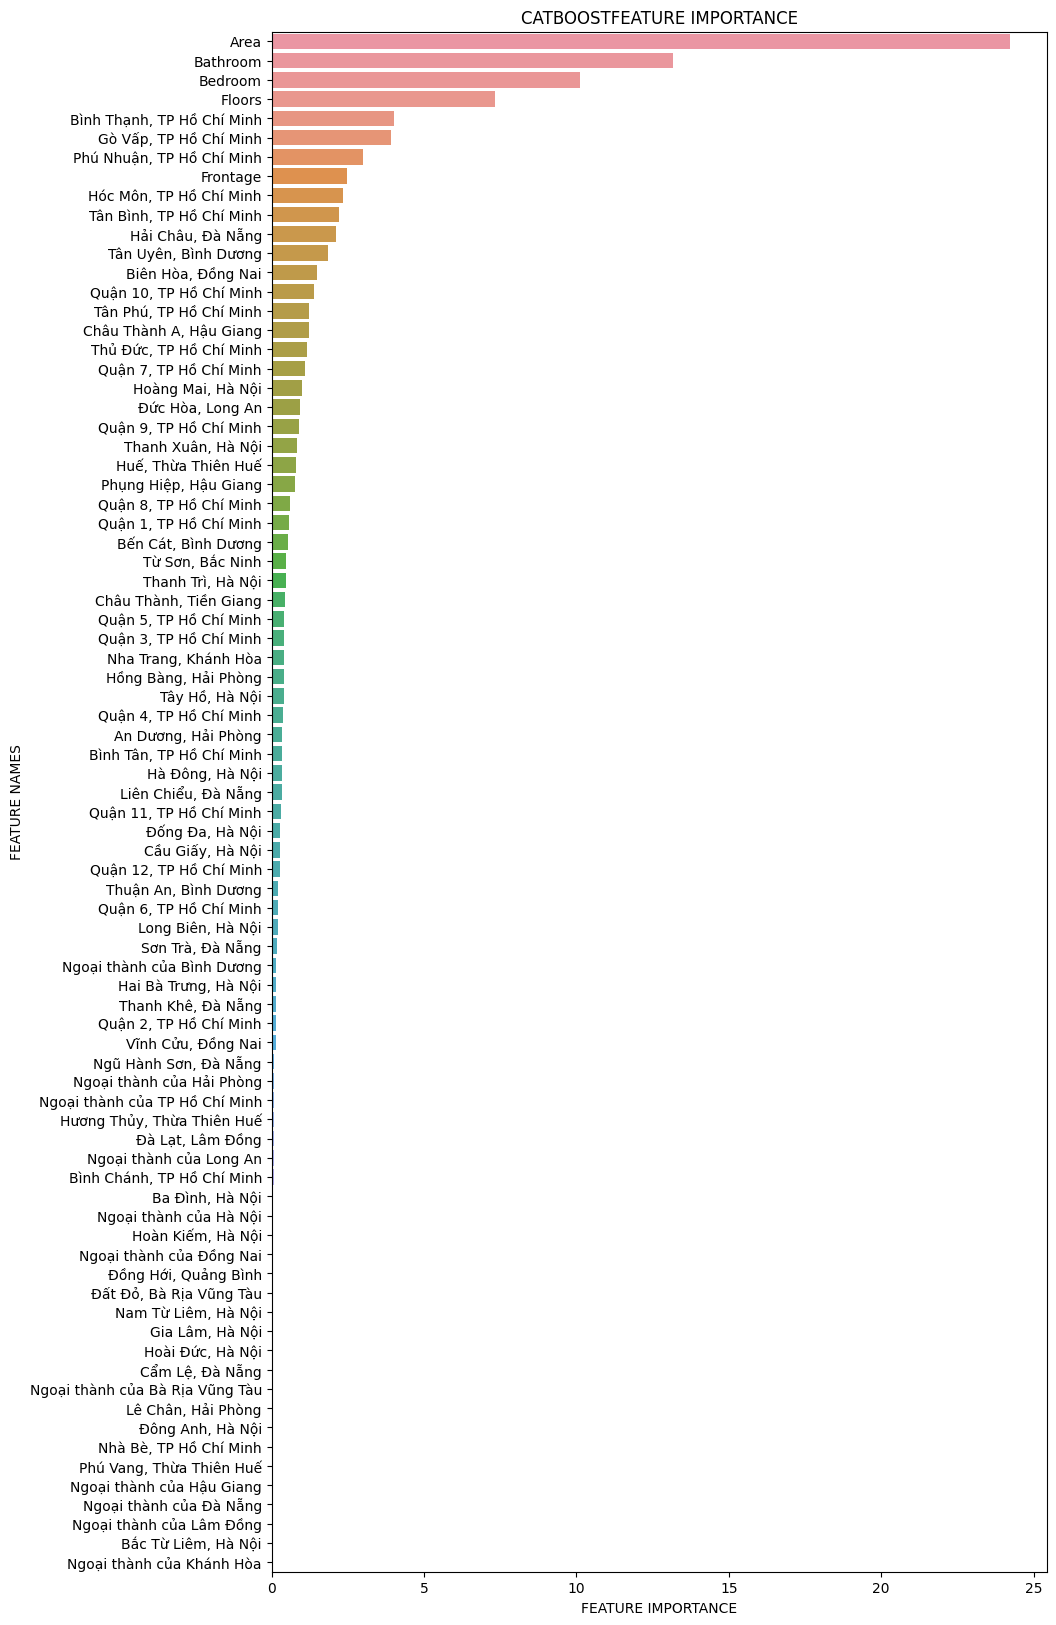

In [ ]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(cat_model.get_feature_importance(),train_data.drop(['Price'], axis=1).columns,'CATBOOST')


**Kết luận:** Dựa vào biểu đồ trên ta thấy các yếu tố như diện tích, số lượng phòng ngủ, phòng tắm, số tầng, mặt tiền của căn nhà và vị trí địa lý (ở khu vực nội thành hay thành phố lớn) sẽ có ảnh hưởng mạnh mẽ tới việc dự đoán cho giá nhà.

## Part 4: Self Assessment

I.   Ưu điểm:

> Cơ bản hoàn thành được các yêu cầu của đề bài như:

> Data:
- Tìm hiểu định dạng của HTML để phân tích và trích xuất dữ liệu từ web.
- Áp dụng regex, BeautifulSoup để thực hiện crawl data
- Tìm hiểu, áp dụng được One Hot Encoding và xử lý Dummy Variable Trap trong Feature Engineering.

> Preprocessing:
- Dùng MICE để fill missing values trong các feature.
- Dùng KMeans để fill missing values trong cột target (ở đây là cột Price).

> Heat Map:
- Lấy được dữ liệu từ web để xuất ra kinh độ và tọa độ của từng địa chỉ.
- Tìm hiểu và vẽ được bản đồ nhiệt, đọc được thông tin từ bản đồ.

> Model:
- Tìm hiểu, sử dụng được một số mô hình phức tạp (CatBoost, XGBoost, Stacking_model).
- Thu được kết quả "chấp nhận được".
- Có thiết kế một "app" nhỏ để dự đoán giá nhà dựa trên các mô hình đã huấn luyện được.

II.   Nhược điểm:

> Chưa xử lý được trọn vẹn data (còn ít feature, có thể data chưa sạch dẫn đến quá trình train model còn một số ít hạn chế)

> Nghĩ ra được một số cách feature engineering nhưng mang vào bài thì không đạt hiệu quả như mong đợi nên không áp dụng vào bài làm trên.

III. Ý tưởng cho deep learning:
> Từ kết quả thu được ta có thể nhận thấy kết quả hiện tại chưa được tốt lắm. Một nguyên nhân có thể đến từ việc chưa có thể tận dụng được tối đa lượng dữ liệu hiện có (cụ thể là dữ liệu ảnh). Tụi em đã có ý tưởng để thêm dữ liệu ảnh vào bằng cách sử dụng deep learning như sau:
- Do các ảnh không đều nhau ta sẽ `center_crop` sau đó `scale` về $100 \times 100$ để có thể đưa vào mô hình.
- Ta sẽ sử dụng autoencoder để tìm `lantern_space` sẽ là đầu vào của mô hình phía sau.
- Ta sẽ đưa các dữ liệu số và `vector` encode của ảnh vào một mô hình FFN để cho máy học dự đoán giá nhà.

![](https://cdn.discordapp.com/attachments/907322799713058846/1118173553037168700/model.png)

> Tuy nhiên do ảnh bị trộn lẫn nhiều outliner (ảnh quảng cáo, sổ đỏ, sổ hồng, bản đồ quy hoạch, hóa đơn ...) nên autoencoder gần như không thể học được `lantern_varible` hiệu quả (loss rất lớn), nên tụi em không thể hiện thực hóa được ý tưởng trên.








